DATA

In [ ]:
!pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
! cp /content/drive/MyDrive/datasets/COVID-19_Radiography_Dataset/kaggle.json ~/.kaggle/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d tawsifurrahman/covid19-radiography-database

 99% 769M/778M [00:08<00:00, 75.9MB/s]
100% 778M/778M [00:08<00:00, 95.4MB/s]


In [ ]:
! mkdir datasets

In [ ]:
! unzip covid19-radiography-database.zip -d datasets

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: datasets/COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: datasets/COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: datasets/COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: datasets/COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: datasets/COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: datasets/COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: datasets/COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: datasets/COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: datasets/COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: datasets/COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: datasets/COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: datasets/COVID-19_Radiogr

In [ ]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import shutil
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

Covid_metadata = pd.read_excel('/content/datasets/COVID-19_Radiography_Dataset/COVID.metadata.xlsx')
Pneumonia_metadata= pd.read_excel('/content/datasets/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx')
LungOpacity_metadata = pd.read_excel('/content/datasets/COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx')
Normal_metadata = pd.read_excel('/content/datasets/COVID-19_Radiography_Dataset/Normal.metadata.xlsx')

print("Metadata normal ",Normal_metadata.shape)
print("Metadata covid ",Covid_metadata.shape)
print("Metadata pneumonia ",Pneumonia_metadata.shape)
print("Metadata Lung Opacity ",LungOpacity_metadata.shape)

Metadata normal  (10192, 4)
Metadata covid  (3616, 4)
Metadata pneumonia  (1345, 4)
Metadata Lung Opacity  (6012, 4)


In [ ]:
Covid_metadata.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


Etiquetas según la clase

In [ ]:
Normal_metadata['label'] = 0
Covid_metadata['label'] = 1
Pneumonia_metadata['label'] = 2
LungOpacity_metadata['label'] = 3

In [ ]:
data_size = 1345

In [ ]:
data0 = Normal_metadata.sample(data_size, random_state=7)
data1 = Covid_metadata.sample(data_size, random_state=7)
data2 = Pneumonia_metadata.sample(data_size, random_state=7)
data3 = LungOpacity_metadata.sample(data_size, random_state=7)

fulldata = pd.concat([data0,data1,data2,data3], axis=0).reset_index(drop=True)

fulldata['label'].value_counts()

0    1345
1    1345
2    1345
3    1345
Name: label, dtype: int64

In [ ]:
fulldata = fulldata.drop(['FORMAT','SIZE','URL'], axis=1)

In [ ]:
fulldata = shuffle(fulldata)
print("Total datos ", fulldata.shape)
fulldata.head()

Total datos  (5380, 2)


,FILE NAME,label
1950,COVID-2574,1
4139,Lung_Opacity-758,3
1050,NORMAL-6559,0
2922,Viral Pneumonia-264,2
4629,Lung_Opacity-1122,3


In [ ]:
data_train, data_test = train_test_split(fulldata, test_size=0.20,
                                         random_state=7, stratify=fulldata['label'])

print("Datos de entrenamiento ", data_train.shape)
print("Datos de prueba ", data_test.shape)

Datos de entrenamiento  (4304, 2)
Datos de prueba  (1076, 2)


In [ ]:
data_train['label'].value_counts()

3    1076
1    1076
0    1076
2    1076
Name: label, dtype: int64

In [ ]:
data_test['label'].value_counts()

2    269
3    269
1    269
0    269
Name: label, dtype: int64

In [ ]:
data_train.shape

(4304, 2)

In [ ]:
## Carpeta origen
co = 'co'
os.mkdir(co)

## Carpeta para las imagenes de entrenamiento

ctrain = os.path.join(co, 'ctrain')
os.mkdir(ctrain)

## Carpeta para las imagenes de testeo
ctest = os.path.join(co, 'ctest')
os.mkdir(ctest)

## Carpetas para cada clase de imagenes de entrenamiento

normal_train = os.path.join(ctrain, 'normal')
os.mkdir(normal_train)

covid_train = os.path.join(ctrain, 'covid')
os.mkdir(covid_train)

pneumonia_train = os.path.join(ctrain, 'pneumonia')
os.mkdir(pneumonia_train)

lungOpacity_train = os.path.join(ctrain, 'lung opacity')
os.mkdir(lungOpacity_train)

## Carpetas para cada clase de imagenes de testeo

normal_test = os.path.join(ctest, 'normal')
os.mkdir(normal_test)

covid_test = os.path.join(ctest, 'covid')
os.mkdir(covid_test)

pneumonia_test = os.path.join(ctest, 'pneumonia')
os.mkdir(pneumonia_test)

lungOpacity_test = os.path.join(ctest, 'lung opacity')
os.mkdir(lungOpacity_test)


In [ ]:
os.listdir('co/ctest')

['pneumonia', 'covid', 'lung opacity', 'normal']

In [ ]:
os.listdir('co/ctrain')

['pneumonia', 'covid', 'lung opacity', 'normal']

In [ ]:
train_list = list(data_train['FILE NAME'])
test_list = list(data_test['FILE NAME'])

In [ ]:

for image in train_list:


    filename = image + '.png'

    target = int(fulldata.loc[fulldata['FILE NAME'] == image, ['label']].values)

    if target == 0:
        label = 'normal'

        filename = filename.capitalize()
        src = os.path.join('/content/datasets/COVID-19_Radiography_Dataset/Normal/images', filename)

    if target == 1:
        label = 'covid'
        src = os.path.join('/content/datasets/COVID-19_Radiography_Dataset/COVID/images', filename)

    if target == 2:
        label = 'pneumonia'
        src = os.path.join('/content/datasets/COVID-19_Radiography_Dataset/Viral Pneumonia/images', filename)

    if target == 3:
        label = 'lung opacity'
        src = os.path.join('/content/datasets/COVID-19_Radiography_Dataset/Lung_Opacity/images', filename)

    dst = os.path.join(ctrain, label, filename)

    shutil.copyfile(src, dst)


for image in test_list:


    filename = image + '.png'

    target = int(fulldata.loc[fulldata['FILE NAME'] == image, ['label']].values)

    if target == 0:
        label = 'normal'

        filename = filename.capitalize()
        src = os.path.join('/content/datasets/COVID-19_Radiography_Dataset/Normal/images', filename)

    if target == 1:
        label = 'covid'
        src = os.path.join('/content/datasets/COVID-19_Radiography_Dataset/COVID/images', filename)

    if target == 2:
        label = 'pneumonia'
        src = os.path.join('/content/datasets/COVID-19_Radiography_Dataset/Viral Pneumonia/images', filename)

    if target == 3:
        label = 'lung opacity'
        src = os.path.join('/content/datasets/COVID-19_Radiography_Dataset/Lung_Opacity/images', filename)

    dst = os.path.join(ctest, label, filename)

    shutil.copyfile(src, dst)

In [ ]:
print("total de imagenes clase normal ",len(os.listdir('co/ctrain/normal')))
print("total de imagenes clase covid ",len(os.listdir('co/ctrain/covid')))
print("total de imagenes clase pneumonia ",len(os.listdir('co/ctrain/pneumonia')))
print("total de imagenes clase lung opacity ",len(os.listdir('co/ctrain/lung opacity')))

total de imagenes clase normal  1076
total de imagenes clase covid  1076
total de imagenes clase pneumonia  1076
total de imagenes clase lung opacity  1076


In [ ]:
print("total de imagenes clase normal ",len(os.listdir('co/ctest/normal')))
print("total de imagenes clase covid ",len(os.listdir('co/ctest/covid')))
print("total de imagenes clase pneumonia ",len(os.listdir('co/ctest/pneumonia')))
print("total de imagenes clase lung opacity ",len(os.listdir('co/ctest/lung opacity')))

total de imagenes clase normal  269
total de imagenes clase covid  269
total de imagenes clase pneumonia  269
total de imagenes clase lung opacity  269


In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (256  , 256)
train_directory = "co/ctrain"
test_directory = "co/ctest"

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
        rotation_range=0.2,
        shear_range=0.2,
        horizontal_flip=True)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_directory,
        target_size=IMG_SIZE,
        color_mode='grayscale',
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_directory,
        target_size=IMG_SIZE,
        color_mode='grayscale',
        batch_size=32,
        shuffle=False,
        class_mode='categorical')

Found 4304 images belonging to 4 classes.
Found 1076 images belonging to 4 classes.


In [ ]:
train_generator.class_indices

{'covid': 0, 'lung opacity': 1, 'normal': 2, 'pneumonia': 3}

In [ ]:
test_generator.class_indices

{'covid': 0, 'lung opacity': 1, 'normal': 2, 'pneumonia': 3}

In [ ]:
train_generator.image_shape

(256, 256, 1)

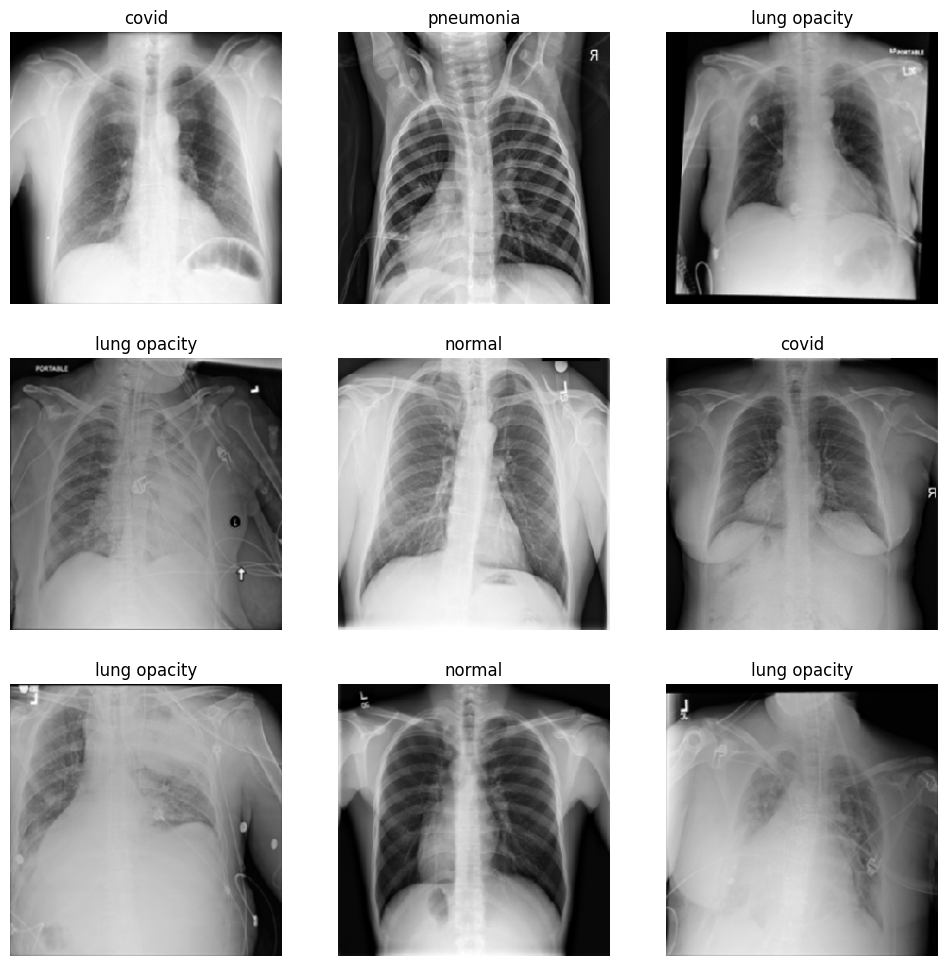

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3,3, i+1)
    img, label = train_generator.next()
    img=img[0,:,:,0]
    plt.imshow(img, cmap='gray')
    dic = { 0:'covid', 1:'lung opacity', 2:'normal', 3:'pneumonia'}
    plt.title(dic.get(np.where(label[0]==1)[0][0]))
    plt.axis('off')
plt.show()

In [ ]:
def clasificador(IMG_SIZE):
    input_shape = IMG_SIZE + (1, )
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", padding='same',input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),

        tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),

        tf.keras.layers.Conv2D(64, (3, 3), padding='same',activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),

        tf.keras.layers.Conv2D(64, (3, 3), padding='same',activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),

        tf.keras.layers.Conv2D(128, (3, 3), padding='same',activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),

        tf.keras.layers.Conv2D(128, (3, 3), padding='same',activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),

        tf.keras.layers.Conv2D(128, (3, 3), padding='same',activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),

        tf.keras.layers.Conv2D(256, (3, 3), padding='same',activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(units=128, activation='relu'),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=4, activation='softmax')
    ])
    return model

In [ ]:
IMG_SIZE

(256, 256)

In [ ]:
model2 = clasificador(IMG_SIZE)

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

In [ ]:
base_learning_rate = 0.001
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
initial_epochs = 15
history = model2.fit(train_generator, epochs=initial_epochs,
                     validation_data = test_generator, callbacks=[early_stopping])

Epoch 1/15
135/135 [==============================] - 451s 3s/step - loss: 1.1472 - accuracy: 0.4452 - val_loss: 0.8559 - val_accuracy: 0.6366
Epoch 2/15
135/135 [==============================] - 451s 3s/step - loss: 0.8446 - accuracy: 0.6341 - val_loss: 0.7580 - val_accuracy: 0.6831
Epoch 3/15
135/135 [==============================] - 454s 3s/step - loss: 0.7832 - accuracy: 0.6626 - val_loss: 0.7203 - val_accuracy: 0.7035
Epoch 4/15
135/135 [==============================] - 457s 3s/step - loss: 0.6861 - accuracy: 0.7175 - val_loss: 0.7150 - val_accuracy: 0.7100
Epoch 5/15
135/135 [==============================] - 473s 4s/step - loss: 0.6286 - accuracy: 0.7398 - val_loss: 0.6295 - val_accuracy: 0.7723
Epoch 6/15
135/135 [==============================] - 458s 3s/step - loss: 0.5473 - accuracy: 0.7828 - val_loss: 0.5509 - val_accuracy: 0.7928
Epoch 7/15
135/135 [==============================] - 452s 3s/step - loss: 0.4955 - accuracy: 0.8074 - val_loss: 0.5081 - val_accuracy: 0.8039

In [ ]:
model2.save('RXmodel2.h5')

In [ ]:
loaded_model = tf.keras.models.load_model('/content/RXmodel1.h5')

In [ ]:
new_predictions = loaded_model.predict(test_generator)

34/34 [==============================] - 44s 1s/step


In [ ]:
loaded_model.evaluate(test_generator)

34/34 [==============================] - 37s 1s/step - loss: 0.2207 - accuracy: 0.9229


[0.220686137676239, 0.9228624701499939]

In [ ]:
model2.evaluate(test_generator)

34/34 [==============================] - 31s 921ms/step - loss: 0.3703 - accuracy: 0.8662


[0.37030351161956787, 0.8661710023880005]

In [ ]:
def plot_loss_acc(new_predictions):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(train_loss))

    plt.figure(figsize=(8,6))
    plt.plot(epochs, train_loss, color='b', label='Train')
    plt.plot(epochs, val_loss, color='r', label='Validation')
    plt.legend()
    plt.title('Model Loss')


    plt.figure(figsize=(8,6))
    plt.plot(epochs, acc, color='b', label='Train')
    plt.plot(epochs, val_acc, color='r', label='Validation')
    plt.legend()
    plt.title('Model Accuracy')

    plt.show()

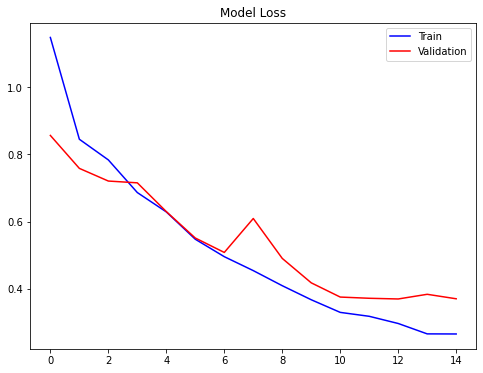

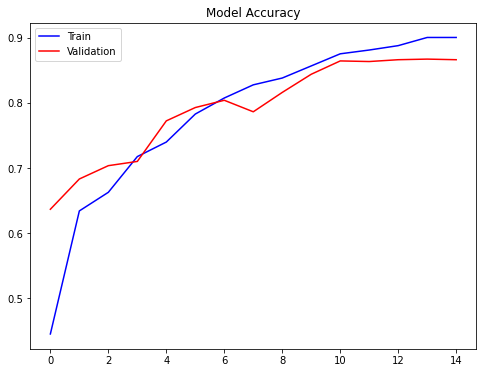

In [ ]:
plot_loss_acc(history)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
val_predict = model2.predict(test_generator)

34/34 [==============================] - 41s 1s/step


In [ ]:
predict_class = np.argmax(val_predict, axis=1)
predict_class = predict_class.tolist()

In [ ]:
## 'covid': 0, 'lung opacity': 1, 'normal': 2, 'pneumonia': 3
labels = ['Covid', 'Lung opacity', 'normal', 'pneumonia']
report = classification_report(test_generator.classes, predict_class, target_names=labels)
print(report)

              precision    recall  f1-score   support

       Covid       0.84      0.94      0.88       269
Lung opacity       0.87      0.83      0.85       269
      normal       0.82      0.80      0.81       269
   pneumonia       0.97      0.94      0.95       269

    accuracy                           0.87      1076
   macro avg       0.88      0.87      0.87      1076
weighted avg       0.88      0.87      0.87      1076



In [ ]:
cm = confusion_matrix(test_generator.classes, predict_class)
cm_df = pd.DataFrame(cm,
                     index = ['COVID','LUNG OPACITY','NORMAL','PNEUMONIA'],
                     columns = ['COVID','LUNG OPACITY','NORMAL','PNEUMONIA'])

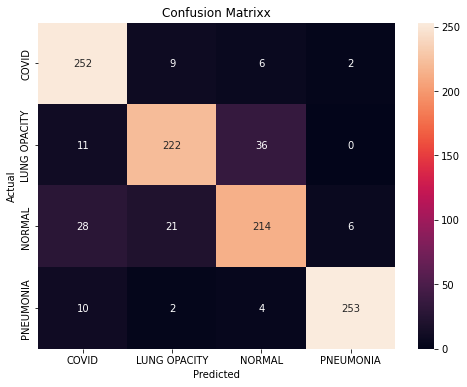

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d')
plt.title("Confusion Matrixx")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()